In [67]:
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Creating empty list for broken tooth and healthy gearbox datasets
broken = []
healthy = []

# Defining the path where the datasets are stored
pth1 = 'dataset/BrokenTooth'
pth2 = 'dataset/Healthy'

# Reading the dataset as the list items using the OS library to access the files and read_csv function from pandas to read the daatasets 
i = 0
for file in os.listdir(pth1):
    broken.append(pd.read_csv(os.path.join(pth1, file)))
    #print(broken[i].head())
    i += 1
    
j = 0
for file in os.listdir(pth2):
    healthy.append(pd.read_csv(os.path.join(pth2, file)))
    #print(healthy[j].head())
    j += 1

In [68]:
#time series graph - (add blocks from here)


In [69]:
# Adding load and broken/healthy information to the dataset
for i in range(0, 10):
    load = 10*i
    # gearbox_status = 0 refers the gearbox is faulty while, failure = 1 refers to healthy gearbox
    broken[i]['load'] = load
    broken[i]['gearbox_status'] = 0
    healthy[i]['load'] = load
    healthy[i]['gearbox_status'] = 1
    #print("broken load ", load , "\n ", broken[i].describe().iloc[ : ,:-2 ], "\n")
    #print("healthy load ", load , "\n ", healthy[i].describe().iloc[ : , :-2 ], "\n")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


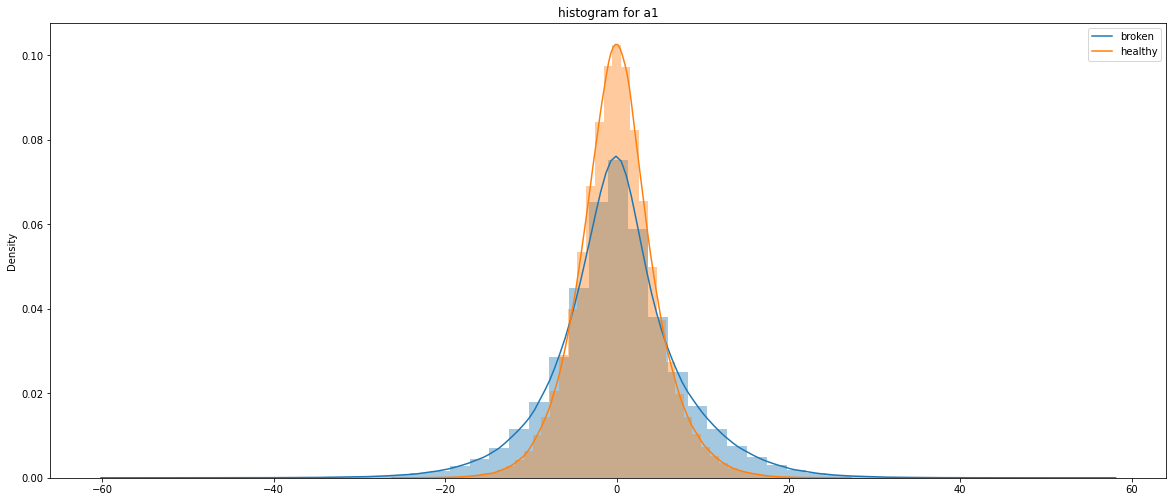

In [96]:
# Aggregating dataset for broken and healthy 
healthy_agg = healthy[0]
broken_agg = broken[0]
for i in range(1,10):
    healthy_agg = healthy_agg.append(healthy[i], ignore_index=True)
    broken_agg = broken_agg.append(broken[i], ignore_index=True)

# Agregrating total dataset
bh_agg = pd.concat([healthy_agg, broken_agg], axis=0, ignore_index=True)

a1 = bh_agg.iloc[:,:1]
plt.figure(figsize=(20,35*10))
gs = gridspec.GridSpec(35, 1)
ax = plt.subplot(gs[i])
sns.distplot(a1[bh_agg.gearbox_status == 1])
sns.distplot(a1[bh_agg.gearbox_status == 0])
ax.set_xlabel('')
plt.legend(['broken', 'healthy'])
ax.set_title('histogram for a1')
plt.show()
